# Chapter 8 : 변화율 이해하기

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_function(f,tmin,tmax,tlabel=None,xlabel=None,axes=False, **kwargs):
    ts = np.linspace(tmin,tmax,1000)
    if tlabel:
        plt.xlabel(tlabel,fontsize=18)
    if xlabel:
        plt.ylabel(xlabel,fontsize=18)
    plt.plot(ts, [f(t) for t in ts], **kwargs)
    if axes:
        total_t = tmax-tmin
        plt.plot([tmin-total_t/10,tmax+total_t/10],[0,0],c='k',linewidth=1)
        plt.xlim(tmin-total_t/10,tmax+total_t/10)
        xmin, xmax = plt.ylim()
        plt.plot([0,0],[xmin,xmax],c='k',linewidth=1)
        plt.ylim(xmin,xmax)

In [3]:
def plot_volume(f,tmin,tmax,axes=False,**kwargs):
    plot_function(f,tmin,tmax,tlabel="time (hr)", xlabel="volume (bbl)", axes=axes, **kwargs)

def plot_flow_rate(f,tmin,tmax,axes=False,**kwargs):
    plot_function(f,tmin,tmax,tlabel="time (hr)", xlabel="flow rate (bbl/hr)", axes=axes, **kwargs)

## 8.1 부피로 평균 유량 계산하기

In [4]:
def volume(t):
    return (t-4)**3 / 64 + 3.3
    
def flow_rate(t):
    return 3*(t-4)**2 / 64

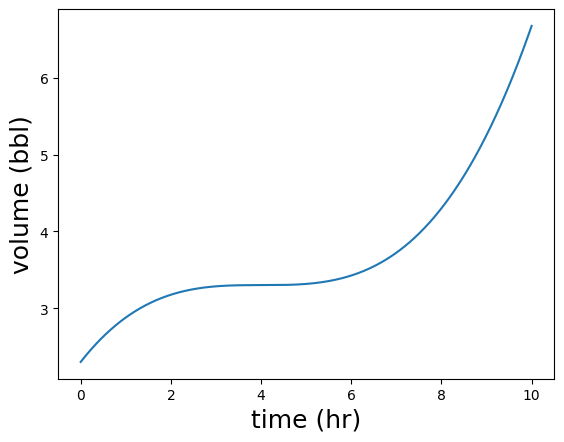

In [5]:
plot_volume(volume, 0, 10)

### 8.1.1 average_flow_rate 함수 구현하기

In [6]:
def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1)) / (t2 - t1)

In [7]:
volume(4)

3.3

In [8]:
volume(9)

5.253125

In [9]:
average_flow_rate(volume, 4, 9)

0.390625

### 8.1.2 할선으로 평균 유량 그리기

### 8.1.3 음의 변화율

In [10]:
def decreasing_volume(t):
    if t < 5:
        return 10 - (t**2)/5
    else:
        return 0.2 * (10-t)**2

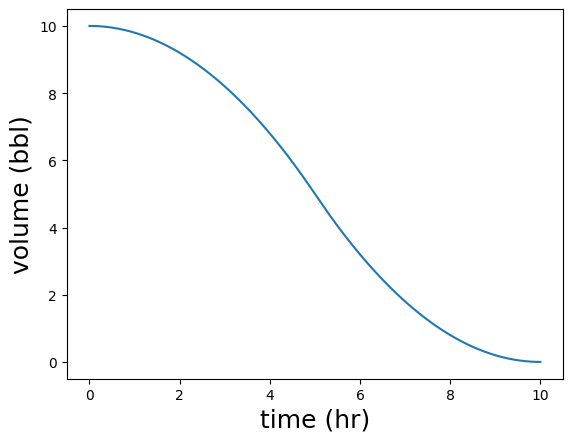

In [11]:
plot_volume(decreasing_volume, 0, 10)

In [12]:
average_flow_rate(decreasing_volume, 0, 4)

-0.8

### 8.1.4 연습문제

8.1 정오에 주행거리계가 77,641 마일일 때 도로 여행을 시작해서 오후 4시 30분에 주행거리계가 77,905 마일일 때 도로 여행을 끝냈다고 하자. 여행 중 평균 속력을 구하라.

In [13]:
(77905 - 77641) / 4.5

58.666666666666664

8.2 함수f(x)와 두 값 x1, x2를 입력으로 받아 시간에 따른 할선을 나타내는 새 함수를 리턴하는 파이썬 함수 secant_line(f,x1,x2)를 작성하라.\
예를 들어 line = secant_line(f,x1,x2)를 실행하면 line(3)은 x=3에서 할선의 y값을 줄 것이다.

In [14]:
def secant_line(f, x1, x2):
    def line(x):
        return f(x1) + (x-x1) * (f(x2)-f(x1))/(x2-x1)
    return line

[연습문제 8.2]의 코드를 사용해 주어진 두 점을 지나는 함수 f의 할선을 플로팅하라.

In [15]:
def plot_secant(f,x1,x2,color='k'):
    line = secant_line(f,x1,x2)
    plot_function(line, x1, x2, c=color)
    plt.scatter([x1,x2], [f(x1),f(x2)], c=color)

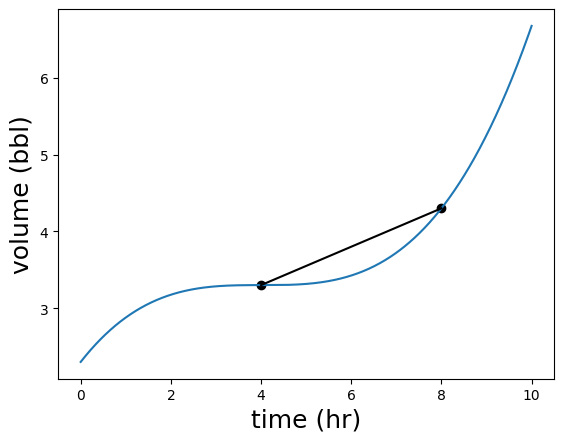

In [16]:
plot_volume(volume, 0, 10)
plot_secant(volume, 4, 8)

## 8.2 시간에 따른 평균 유량 플로팅하기

### 8.2.1 시간 구간별 평균 유량 구하기

In [17]:
import numpy as np
np.arange(0,10,0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [18]:
def interval_flow_rates(v, t1, t2, dt):
    return [(t,average_flow_rate(v, t, t+dt)) for t in np.arange(t1, t2, dt)]

In [19]:
interval_flow_rates(volume, 0, 10, 1)

[(0, 0.578125),
 (1, 0.296875),
 (2, 0.109375),
 (3, 0.015625),
 (4, 0.015625),
 (5, 0.109375),
 (6, 0.296875),
 (7, 0.578125),
 (8, 0.953125),
 (9, 1.421875)]

### 8.2.2 시간 구간별 평균 유량 플로팅하기

In [20]:
def plot_interval_flow_rates(volume, t1, t2, dt):
    series = interval_flow_rates(volume, t1, t2, dt)
    times = [t for (t,_) in series]
    rates = [q for (_,q) in series]
    plt.scatter(times, rates)

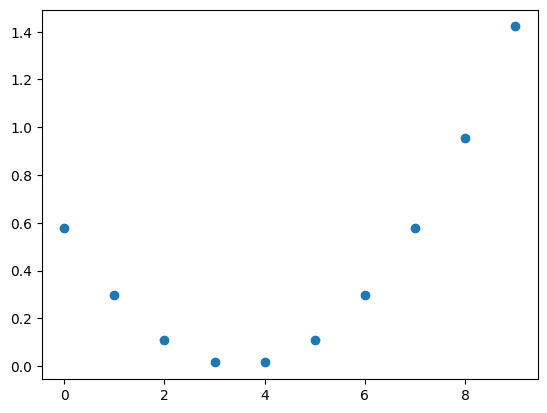

In [21]:
plot_interval_flow_rates(volume, 0, 10, 1)

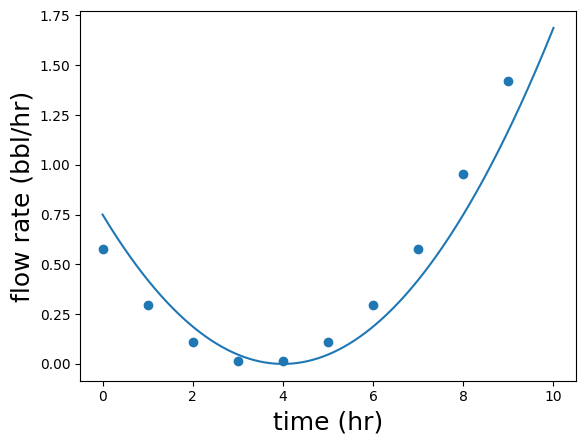

In [22]:
plot_flow_rate(flow_rate, 0, 10)
plot_interval_flow_rates(volume, 0, 10, 1)

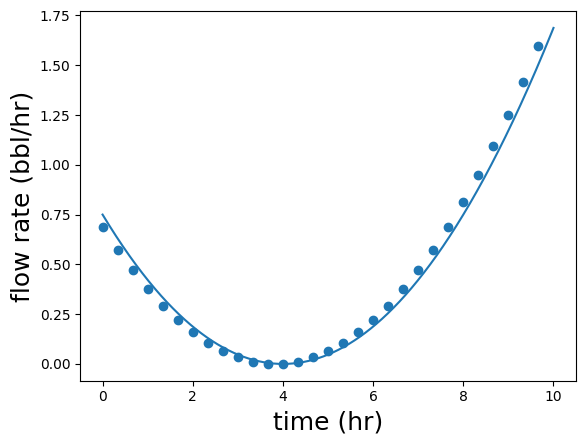

In [23]:
plot_flow_rate(flow_rate,0,10)
plot_interval_flow_rates(volume,0,10,1/3)

### 8.2.3 연습문제

8.4 시간에 따른 decreasing_volume의 유량을 0.5 시간 간격으로 평균 유량을 플로팅하라. 평균유량이 가장 작은 구간은 언제인지 구하라.\
즉, 탱크에서 석유가 빠져나가는 속도가 가장 빠른 시간 구간을 구하라.

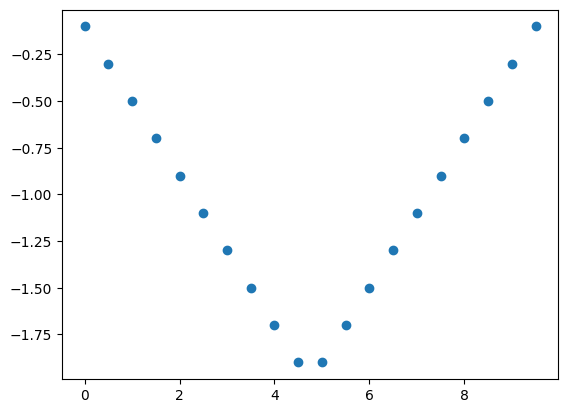

In [24]:
plot_interval_flow_rates(decreasing_volume, 0, 10, 0.5)

8.5 부피가 시간에 대한 일차함수 linear_volume_function을 작성한 뒤, 이 상황에서는 시간에 따른 평균 유량이 일정함을 보여주는 플롯을 그려라.

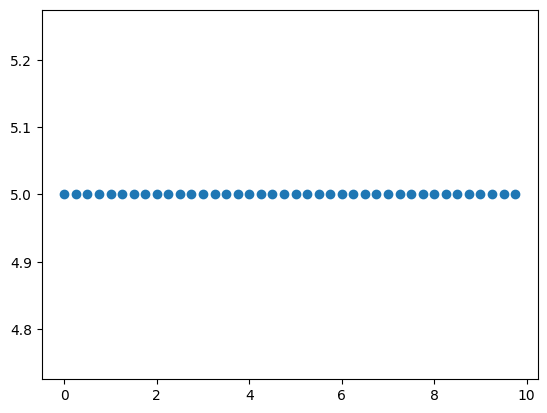

In [25]:
def linear_volume_function(t):
    return 5*t + 3

plot_interval_flow_rates(linear_volume_function, 0, 10, 0.25)

## 8.3 순간 유량 근사하기

### 8.3.1 작은 할선의 기울기 구하기

In [26]:
average_flow_rate(volume, 0.5, 1.5)

0.42578125

In [27]:
average_flow_rate(volume,0.9,1.1)

0.4220312499999988

In [28]:
average_flow_rate(volume,0.99,1.01)

0.42187656249998945

In [29]:
average_flow_rate(volume,0.999,1.001)

0.42187501562509583

In [30]:
average_flow_rate(volume,0.9999,1.0001)

0.42187500015393936

In [31]:
average_flow_rate(volume,0.99999,1.00001)

0.4218750000002602

In [32]:
flow_rate(1)


0.421875

8.3.2 Building the instantaneous flow rate function

In [33]:
def instantaneous_flow_rate(v, t, digits=6):
    tolerance = 10 ** (-digits) 
    h = 1
    approx = average_flow_rate(v, t-h, t+h)
    for i in range(0, 2*digits):
        h = h / 10
        next_approx = average_flow_rate(v, t-h, t+h)
        if abs(next_approx - approx) < tolerance:
            return round(next_approx, digits)
        else:
            approx = next_approx
    raise Exception("Derivate did not converge")

In [34]:
instantaneous_flow_rate(volume, 1)

0.421875

### 8.3.3 순간 유량함수의 커링과 플로팅

In [35]:
def get_flow_rate_function(v):
    def flow_rate_function(t):
        instantaneous_flow_rate(v,t)
    return flow_rate_function

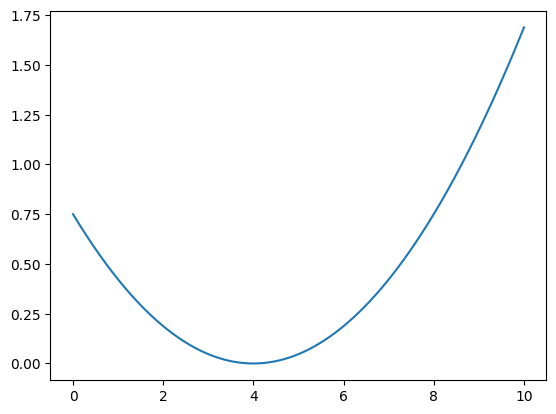

In [36]:
plot_function(flow_rate, 0, 10)
plot_function(get_flow_rate_function(volume), 0, 10)

### 8.3.4 연습문제

8.6 volume 함수의 그래프가 0.999시에서 1.001시까지 구간에서는 직선이 아님을 확인하라.

In [37]:
volume(1)

2.878125

In [38]:
secant_line(volume, 0.999, 1.001)(1)

2.8781248593749997

8.7 t=8에서 부피 그래프의 접선 기울기를 근삿값으로 구하라. t=8 주변의 구간이 점점 작아질 때의 할선 기울기를 계산하면 된다.

In [39]:
average_flow_rate(volume,7.9,8.1)

0.7501562500000007

In [40]:
average_flow_rate(volume,7.99,8.01)

0.750001562499996

In [41]:
average_flow_rate(volume,7.999,8.001)

0.7500000156249458

In [42]:
average_flow_rate(volume,7.9999,8.0001)

0.7500000001554312

8.8 파이썬을 정의된 sign함수는 x=0에서 미분계수를 갖지 않음을 확인하라.

In [43]:
def sign(x):
    return x / abs(x)

In [44]:
average_flow_rate(sign,-0.1,0.1)

10.0

In [45]:
average_flow_rate(sign,-0.01,0.01)

100.0

In [46]:
average_flow_rate(sign,-0.001,0.001)

1000.0

In [47]:
average_flow_rate(sign,-0.000001,0.000001)

1000000.0

## 8.4 부피 변화량 근사하기

### 8.4.1 작은 시간 구간 동안의 부피 변화량 구하기

In [48]:
def small_volume_change(q,t,dt):
    return q(t) * dt

In [49]:
small_volume_change(flow_rate, 2, 1)

0.1875

In [50]:
volume(3) - volume(2)

0.109375

In [51]:
small_volume_change(flow_rate, 2, 0.01)

0.001875

In [52]:
volume(2.01) - volume(2)

0.0018656406250001645

### 8.4.2 시간을 작은 시간 구간으로 쪼개기

In [53]:
def volume_change(q, t1, t2, dt):
    return sum(small_volume_change(q, t, dt) for t in np.arange(t1, t2, dt))

In [54]:
volume_change(flow_rate, 0, 10, 0.1)

4.32890625

In [55]:
volume(10) - volume(0)

4.375

In [56]:
volume_change(flow_rate, 0, 10, 0.0001)

4.3749531257812455

### 8.4.4 연습문제

8.9 처음 6시간 동안 탱크에 주입된 석유량과 마지막 4시간 동안 탱크에 주입된 석유량을 각각 근사적으로 구하라.\
두 구간 중 주입된 석유량이 더 많은 구간을 구하라.

In [57]:
volume_change(flow_rate, 0, 6, 0.01)

1.1278171874999996

In [59]:
volume_change(flow_rate, 6, 10, 0.01)

3.2425031249999257

## 8.5 시간에 따른 부피 플로팅하기

### 8.5.1 시간에 따른 부피 구하기

In [60]:
def approximate_volume(q, v0, dt, T):
    return v0 + volume_change(q, 0, T, dt)

In [62]:
def approximate_volume_function(q, v0, dt):
    def volume_function(T):
        return approximate_volume(q, v0, dt, T)
    return volume_function

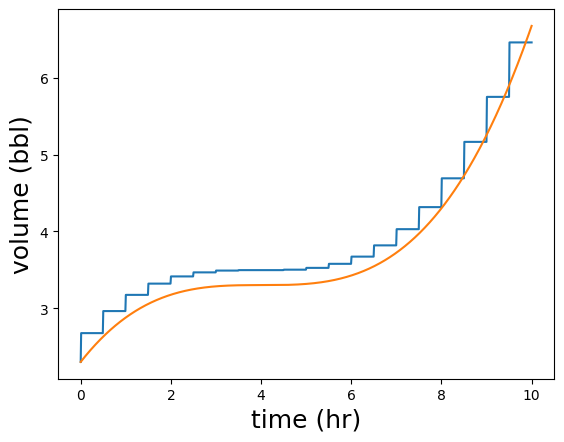

In [66]:
plot_volume(approximate_volume_function(flow_rate, 2.3, 0.5), 0, 10) # 파란색
plot_volume(volume, 0, 10) # 주황색

### 8.5.2 부피 함수에 대한 리만합 그리기

In [67]:
np.arange(0, 3.9, 0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5])

### 8.5.3 근삿값 개선하기

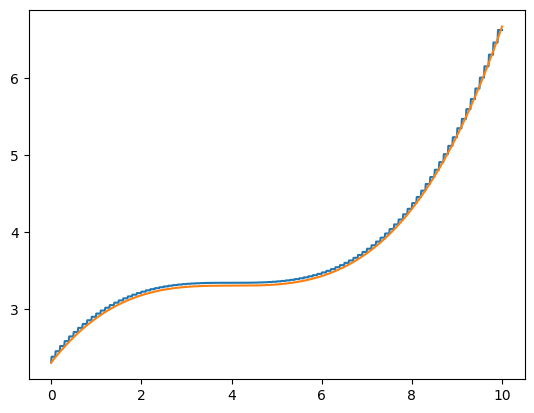

In [69]:
plot_function(approximate_volume_function(flow_rate, 2.3, 0.1), 0, 10)
plot_function(volume, 0, 10)

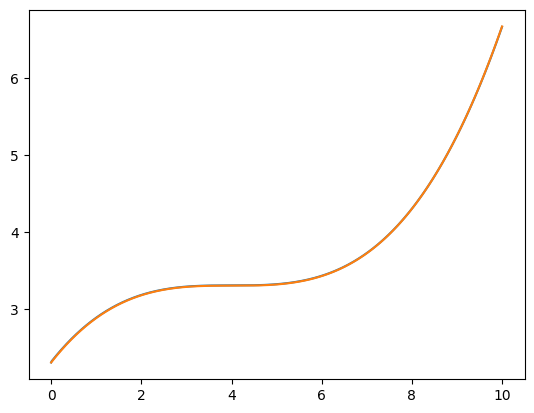

In [70]:
plot_function(approximate_volume_function(flow_rate, 2.3, 0.01), 0, 10)
plot_function(volume, 0, 10)

In [71]:
def get_volume_function(q, v0, digits=6):
    def volume_function(T):
        tolerance = 10 ** (-digits)
        dt = 1
        approx = v0 + volume_change(q, 0, T, dt)
        for i in range(0, digits*2):
            dt = dt / 10
            next_approx = v0 + volume_change(q, 0, T, dt)
            if abs(next_approx - approx) < tolerance:
                return round(next_approx,digits)
            else:
                approx = next_approx
        raise Exception("Did not converge!")
    return volume_function

In [72]:
v = get_volume_function(flow_rate, 2.3, digits=3)
v(1)

2.878

In [73]:
v = get_volume_function(flow_rate, 2.3, digits=6)
v(1)

2.878125